In [1]:
import random
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from pyclustering.cluster.kmedoids import kmedoids
from math import log10
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import os
import sys
import time

In [4]:
N_LEVELS = 10

TESTS_PER_LEVEL = 200000

MAX_N_ELEMENTS = 1000000
MIN_N_ELEMENTS = 1

MAX_BAG_SIZE = 1000000
MIN_BAG_SIZE = 1
# NOTA: El valor de los pesos tendra como maximo el valor de la mochila
MAX_VALUE = 1000000
MIN_VALUE = 1

PATH_TO_DATASET = "Uniform/DataSet/"

[200000.         100000.          66666.66666667  50000.
  40000.          33333.33333333  28571.42857143  25000.
  22222.22222222  20000.        ]


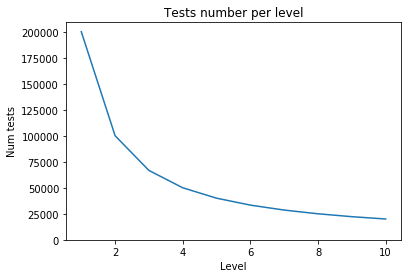

In [3]:
x = np.arange(1, N_LEVELS+1, 1)
y = TESTS_PER_LEVEL/x
print(y)
plt.plot(x, y)
plt.ylim(ymin=0)

plt.xlabel('Level')
plt.ylabel('Num tests')
plt.title('Tests number per level')
plt.show()

In [7]:
for level in range(10):
    print("______LEVEL",level+1,"______")
    print("Sampling...")
    max_lev = (int)(MAX_N_ELEMENTS*((level + 1)/N_LEVELS)**4)
    print(max_lev)

______LEVEL 1 ______
Sampling...
100
______LEVEL 2 ______
Sampling...
1600
______LEVEL 3 ______
Sampling...
8100
______LEVEL 4 ______
Sampling...
25600
______LEVEL 5 ______
Sampling...
62500
______LEVEL 6 ______
Sampling...
129600
______LEVEL 7 ______
Sampling...
240099
______LEVEL 8 ______
Sampling...
409600
______LEVEL 9 ______
Sampling...
656100
______LEVEL 10 ______
Sampling...
1000000


In [4]:
def index_list_by_level():
    uniform_level = []
    for level in range(N_LEVELS):
        uniform_level.append([])
        
    for instance in os.listdir(PATH_TO_DATASET):
        index, num = open(PATH_TO_DATASET + (str)(instance),'r').read().split()[:2]
        indice = (int)((int)(num)*(N_LEVELS-1)/MAX_N_ELEMENTS)
        print(index, num, indice)
        uniform_level[indice].append(index)
    return uniform_level
        
def get_instance(index):
    return list(map(int, open(PATH_TO_DATASET + index,'r').read().split()))

def get_features(weights, values):
    mean_w = np.mean(weights)
    median_w = np.median(weights) 
    desv_w = np.std(weights)
    min_w = min(weights)
    max_w = max(weights)
    mean_v = np.mean(values)
    median_v = np.median(values) 
    desv_v = np.std(values)
    min_v = min(values)
    max_v = max(values) 
    p_coef, p_value = pearsonr(weights, values)

    if (mean_w == 0 or median_w == 0 or desv_w == 0 or mean_v == 0 or median_v == 0 or desv_v ==0):
        return -1
    
    return [num_elem, # n
            cap, # cap
            cap/mean_w,
            cap/median_w,
            cap/desv_w,
            mean_w/mean_v,
            median_w/median_v,
            desv_w/desv_v,
            max_w - min_w,
            max_v - min_v,
            mean_w, 
            median_w, 
            desv_w, 
            min_w, 
            max_w, 
            mean_v, 
            median_v, 
            desv_v, 
            min_v, 
            max_v,
            p_coef]

In [6]:
# uniform_data = index_list_by_level()
count = 0
for level in [8,9]:
    print("______LEVEL",level+1,"______")
    print("Sampling...")
    n_tests = (int)(TESTS_PER_LEVEL/(level+1))
    min_lev = (int)(MAX_N_ELEMENTS*(level/N_LEVELS)**4)
    max_lev = (int)(MAX_N_ELEMENTS*((level + 1)/N_LEVELS)**4)
    max_cap = (int)(MAX_BAG_SIZE*((level + 1)/N_LEVELS)**4)+1
    max_val = (int)(MAX_BAG_SIZE*((level + 1)/N_LEVELS)**4)
    for test in range(n_tests):
        
        cap = random.randint(MIN_BAG_SIZE, max_cap)+1
        num_elem = random.randint(1+min_lev, max_lev)
        weights = np.random.randint(MIN_BAG_SIZE, cap, num_elem)
        values = np.random.randint(MIN_VALUE, max_val, num_elem)
        
        features = get_features(weights, values)
        if features == -1: 
            test -= 1
            continue
        lvl_features = open('/media/isaias/isa/full_dataset/datasetlvl'+str(level+1)+'/features/'+str(test),'w')
        lvl_dataset = open('/media/isaias/isa/full_dataset/datasetlvl'+str(level+1)+'/dataset/'+str(test), 'w')
        print(test, num_elem, cap, *weights, *values, sep=' ', file=lvl_dataset)
        print(*features, sep=' ', file=lvl_features)  
        if(test%1000==0):
            print(str(test),'/',str(n_tests))

______LEVEL 9 ______
Sampling...
0 / 22222
1000 / 22222
2000 / 22222
3000 / 22222
4000 / 22222
5000 / 22222
6000 / 22222
7000 / 22222
8000 / 22222
9000 / 22222
10000 / 22222


OSError: [Errno 5] Input/output error